In [48]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tqdm

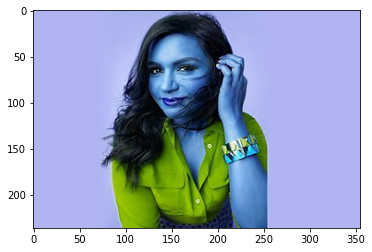

In [51]:
for per in os.listdir("./drive/My Drive/dataset/celebrity_image/train"):
  # print(per)
  Path=os.path.join("./drive/My Drive/dataset/celebrity_image/train",per)
  for img in os.listdir(Path):
    if ".jpg" in img:
      im=cv2.imread(Path+"/"+img)
      plt.imshow(im)

In [52]:
eye_hascade=cv2.CascadeClassifier("./drive/My Drive/haarcascades/haarcascade_eye.xml")
face_hascade=cv2.CascadeClassifier("./drive/My Drive/haarcascades/haarcascade_frontalface_default.xml")


In [53]:
os.listdir("./drive/My Drive/haarcascades/")

['haarcascade_upperbody.xml',
 'haarcascade_frontalcatface_extended.xml',
 'haarcascade_profileface.xml',
 'haarcascade_fullbody.xml',
 'haarcascade_eye.xml',
 'haarcascade_frontalcatface.xml',
 'haarcascade_frontalface_default.xml',
 'haarcascade_eye_tree_eyeglasses.xml',
 'haarcascade_frontalface_alt.xml',
 'haarcascade_righteye_2splits.xml',
 'haarcascade_lowerbody.xml',
 'haarcascade_russian_plate_number.xml',
 'haarcascade_smile.xml',
 'haarcascade_frontalface_alt2.xml',
 'haarcascade_frontalface_alt_tree.xml',
 'haarcascade_lefteye_2splits.xml',
 'haarcascade_licence_plate_rus_16stages.xml']

In [54]:
faces=face_hascade.detectMultiScale(im,1.3,5)
faces

array([[113,  35,  76,  76]], dtype=int32)

In [55]:
(x,y,w,h)=faces[0]

In [56]:
x,y,w,h

(113, 35, 76, 76)

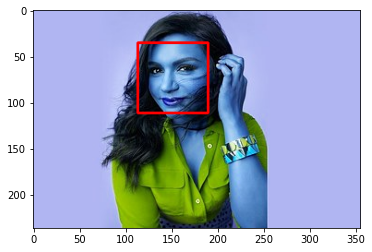

In [57]:
face_img=cv2.rectangle(im,(x,y),(x+w,y+w),(255,0,0),2)
plt.imshow(im)

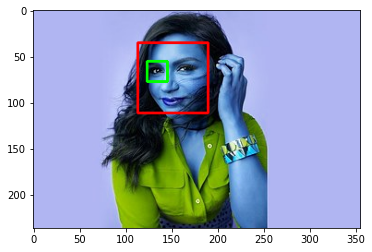

In [58]:
for(x,y,h,w) in faces:
  face_img=cv2.rectangle(im,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray=im[y:y+h,x:x+w]
  roi_color=face_img[y:y+h,x:x+w]
  eyes=eye_hascade.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

  plt.figure()
  plt.imshow(face_img,cmap="gray")
  plt.show()

In [62]:
def get_cropped_images_if_2_year(image_path):
  img=cv2.imread(image_path)
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2BGRA)
  faces=face_hascade.detectMultiScale(gray,1.3,5)
  for (x,y,w,h) in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    eyes=eye_hascade.detectMultiScale(roi_gray)
    if len(eyes) >= 2:
      return roi_color

In [63]:
cropped_img=get_cropped_images_if_2_year(".//httpwwwpictureszimbiocomgiMindyKalingLkvEhTwDeJm.jpg")
plt.imshow(cropped_img)

error: ignored

In [ ]:
path_to_data="./drive/My Drive/datasets/celebrity_image/data/train"
path_to_cr_data="./drive/My Drive/image/cropped/"

In [ ]:
img_dirs=[]
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    img_dirs.append(entry.path)

FileNotFoundError: ignored

In [ ]:
img_dirs

[]

In [ ]:
import shutil
if os.path.exists(path_to_data):
  shutil.rmtree(path_to_data)
os.mkdir(path_to_cr_data)

FileExistsError: ignored

In [ ]:
cropped_image_dirs={}
celebrity_file_name_dict={}

for img_dir in img_dirs:
  celebrity_name=img_dir.split("/")[-1]
  print(celebrity_name)

  for entity in os.scandir(img_dirs):
    roi_solor=get_cropped_images_if_2_year(entry.path)
    if roi_color is not None:
      cropped_folder=path_to_cr_data + celebrity_name
      if not os.path.exists(cropped_folder):
        os.mkdir(cropped_img)
        print("Genrating cropped images in folder: ",cropped_folder)
        


madonna


TypeError: ignored